In [ ]:
import os
import h5py
import numpy as np
import pandas as pd
from natsort import natsorted
import matplotlib.pyplot as plt

In [ ]:
data = natsorted(os.listdir("data/trained_models"))

# An h5 file is supposed to be a dictionary of labeled datasets.
gm_h5 = h5py.File("data/EPInformer/GM12878_enhancer_promoter_encoding.rna_encoding.hg38.h5")
k5_h5 = h5py.File("data/EPInformer/K562_enhancer_promoter_encoding.rna_encoding.hg38.h5")

In [ ]:
def decode_and_plot(df, h5):
    # Grabs the rows that match the condition we set (negative predictions, error threshold, etc).
    bool_df = [gene.decode() in df for gene in h5["ensid"]]
    rna_signals = h5["rna"][:][bool_df]

    # Only look at the graphs that have a signal.
    filtered_0s = rna_signals[np.any(rna_signals != 0, axis = 1)]
    signal_index = np.where(np.any(rna_signals != 0, axis = 1))[0]
    only_0s_index = np.where(np.any(rna_signals == 0, axis = 1))[0]

    print(f"Total Number of Matches: {len(rna_signals)}")
    print(f"Total Matches with >= 1 Non-Zero Value: {len(filtered_0s)}")

    print(f"TSSs w/ Signal: {[gene.decode() for gene in h5["ensid"][:][signal_index]]}")
    print(f"TSSs w/ No Signal: {[gene.decode() for gene in h5["ensid"][:][only_0s_index]]}")

    for signal in filtered_0s[0:5]:
        plt.plot(signal)

In [ ]:
def test_thresholds(dict, h5, conditional_column, thresholds, operand):
    for threshold in thresholds:
        if operand == "g":
            ensid_matches = list(dict[dict[conditional_column] > threshold].iloc[:, 0])
        elif operand == "gt":
            ensid_matches = list(dict[dict[conditional_column] >= threshold].iloc[:, 0])
        elif operand == "l":
            ensid_matches = list(dict[dict[conditional_column] < threshold].iloc[:, 0])
        elif operand == "lt":
            ensid_matches = list(dict[dict[conditional_column] <= threshold].iloc[:, 0])

        print(f"Threshold: {threshold}")
        decode_and_plot(ensid_matches, h5)
        plt.show()
        plt.clf()

In [ ]:
results_dict = {}
results_dict["GM12878"] = pd.DataFrame()
results_dict["K562"] = pd.DataFrame()

for file in data:
    df = pd.read_csv(f"data/trained_models/{file}")
    if "GM12878" in file:
        results_dict["GM12878"] = pd.concat([results_dict["GM12878"], df], ignore_index=True)
    else:
        results_dict["K562"] = pd.concat([results_dict["K562"], df], ignore_index=True)

print(f"Num Rows (GM12878): {len(results_dict["GM12878"])}")
print(f"Num Rows (K562): {len(results_dict["K562"])}")

In [ ]:
neg_pred_dict = {}
neg_pred_dict["GM12878"] = []
neg_pred_dict["K562"] = []

low_error_dict = {}
low_error_dict["GM12878"] = []
low_error_dict["K562"] = []

high_error_dict = {}
high_error_dict["GM12878"] = []
high_error_dict["K562"] = []

for key in results_dict.keys():
    print(f"{key}: ")
    results_dict[key]["Error"] = abs(results_dict[key]["Pred"] - results_dict[key]["actual"])

    results_dict[key]["Neg Pred"] = results_dict[key]["Pred"] < 0
    neg_pred_dict[key] = list(results_dict[key][results_dict[key]["Neg Pred"]].iloc[:, 0])

    print(f"Mean Error per Fold:\n{results_dict[key].groupby("fold_idx")["Error"].mean()}")

    print(f"\nMax Error Fold: {results_dict[key].groupby("fold_idx")["Error"].mean().max()} at Fold {results_dict[key].groupby("fold_idx")["Error"].mean().idxmax()}")

    print(f"\nMin Error Fold: {results_dict[key].groupby("fold_idx")["Error"].mean().min()} at Fold {results_dict[key].groupby("fold_idx")["Error"].mean().idxmin()}")

    print(f"\nMean Error: {results_dict[key]["Error"].mean()}")

    print(f"\nMax Error: {results_dict[key]["Error"].max()}")

    print(f"\nMin Error: {results_dict[key]["Error"].min()} \n")

Negative Predictions

Threshold: 0
Total Number of Matches: 334
Total Matches with >= 1 Non-Zero Value: 60
TSSs w/ Signal: ['ENSG00000310526', 'ENSG00000240409', 'ENSG00000272438', 'ENSG00000187634_1', 'ENSG00000187634_2', 'ENSG00000187961', 'ENSG00000187642', 'ENSG00000304119', 'ENSG00000162571', 'ENSG00000127054', 'ENSG00000224051', 'ENSG00000107404', 'ENSG00000221978', 'ENSG00000242485', 'ENSG00000235098', 'ENSG00000215915', 'ENSG00000160072', 'ENSG00000197530_1', 'ENSG00000169885', 'ENSG00000067606_1', 'ENSG00000116151_1', 'ENSG00000157873_2', 'ENSG00000157870', 'ENSG00000169717', 'ENSG00000238260', 'ENSG00000078900_1', 'ENSG00000235169', 'ENSG00000169598_1', 'ENSG00000131697', 'ENSG00000158286', 'ENSG00000097021_1', 'ENSG00000041988', 'ENSG00000041988_1', 'ENSG00000007923', 'ENSG00000049245', 'ENSG00000049246', 'ENSG00000049247', 'ENSG00000116285', 'ENSG00000074800_1', 'ENSG00000049239', 'ENSG00000188807', 'ENSG00000171603', 'ENSG00000054523', 'ENSG00000142657', 'ENSG00000120948_1', 'ENSG00000116670', 

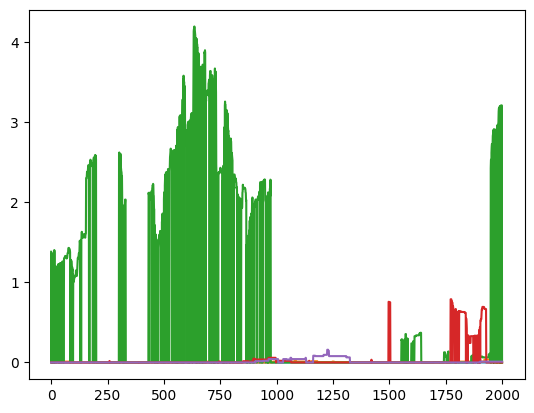

Threshold: 0
Total Number of Matches: 532
Total Matches with >= 1 Non-Zero Value: 108
TSSs w/ Signal: ['ENSG00000107404', 'ENSG00000228594', 'ENSG00000157933_1', 'ENSG00000116151', 'ENSG00000149527_1', 'ENSG00000236423', 'ENSG00000116254', 'ENSG00000116251_1', 'ENSG00000158286', 'ENSG00000116251_2', 'ENSG00000158292', 'ENSG00000097021_2', 'ENSG00000069812', 'ENSG00000187017', 'ENSG00000187017_2', 'ENSG00000041988', 'ENSG00000171735_1', 'ENSG00000049249', 'ENSG00000116288', 'ENSG00000116288_1', 'ENSG00000227634', 'ENSG00000142599_1', 'ENSG00000074800_1', 'ENSG00000142583_1', 'ENSG00000142583_3', 'ENSG00000180758', 'ENSG00000228526', 'ENSG00000228526_1', 'ENSG00000228526_2', 'ENSG00000171621', 'ENSG00000130939', 'ENSG00000160049', 'ENSG00000142655', 'ENSG00000230337', 'ENSG00000132879', 'ENSG00000116663', 'ENSG00000116670', 'ENSG00000177000_1', 'ENSG00000011021', 'ENSG00000116688_2', 'ENSG00000048707_1', 'ENSG00000048707_3', 'ENSG00000171729', 'ENSG00000142634', 'ENSG00000142627', 'ENSG0

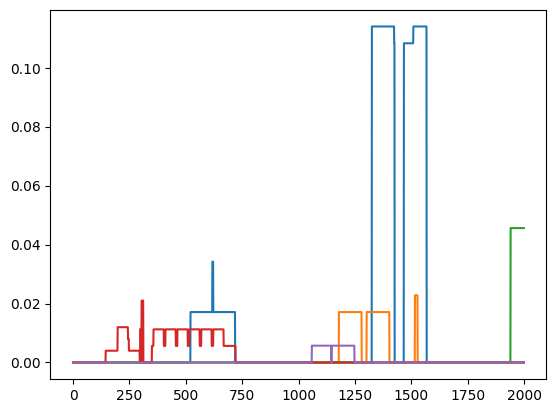

<Figure size 640x480 with 0 Axes>

In [284]:
test_thresholds(results_dict["GM12878"], gm_h5, "Pred", [0], "l")
test_thresholds(results_dict["K562"], k5_h5, "Pred", [0], "l")

Low Errors

In [ ]:
results_dict["GM12878"]["Error"].quantile([0.01, 0.05, 0.1])

In [ ]:
results_dict["K562"]["Error"].quantile([0.01, 0.05, 0.1])

In [ ]:
print("GM12878: ")
test_thresholds(results_dict["GM12878"], gm_h5, "Error", [0.001, 0.01, 0.1], "l")

print("K562: ")
test_thresholds(results_dict["K562"], k5_h5, "Error", [0.001, 0.01, 0.1], "l")

High Errors

In [ ]:
results_dict["GM12878"]["Error"].quantile([0.9, 0.95, 0.99])

In [ ]:
results_dict["K562"]["Error"].quantile([0.9, 0.95, 0.99])

In [ ]:
print("GM12878: ")
test_thresholds(results_dict["GM12878"], gm_h5, "Error", [1, 1.5, 2], "g")

print("K562: ")
test_thresholds(results_dict["K562"], k5_h5, "Error", [1, 1.5, 2], "g")